In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import image_dataset_from_directory,to_categorical


In [4]:
def load_data(dir,image_size=(32,32)):
    data=image_dataset_from_directory(dir,image_size=image_size)
    images,labels=[],[]
    for x,y in data:
        images.append(x.numpy().astype('float32')/255.0)
        labels.append(y.numpy())
    X=np.concatenate(images)
    Y=np.concatenate(labels)
    Y=to_categorical(Y,10)
 
    return X,Y

In [5]:
X,Y=load_data("D:\\Source_code\\Lab\\data\\cifar10\\train")

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=42,stratify=Y,test_size=0.2)

Found 50000 files belonging to 10 classes.


In [8]:
model=Sequential([
    Conv2D(32,3,activation='relu',input_shape=(xtrain.shape[1:])),
    MaxPooling2D(),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
logs=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3463 - loss: 1.7752 - val_accuracy: 0.4518 - val_loss: 1.5225
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4757 - loss: 1.4462 - val_accuracy: 0.4949 - val_loss: 1.4099
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5207 - loss: 1.3315 - val_accuracy: 0.5362 - val_loss: 1.3021
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5512 - loss: 1.2496 - val_accuracy: 0.5525 - val_loss: 1.2511
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5760 - loss: 1.1932 - val_accuracy: 0.5678 - val_loss: 1.2262


C:\Users\luzif\AppData\Local\Temp\ipykernel_5204\3360923045.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


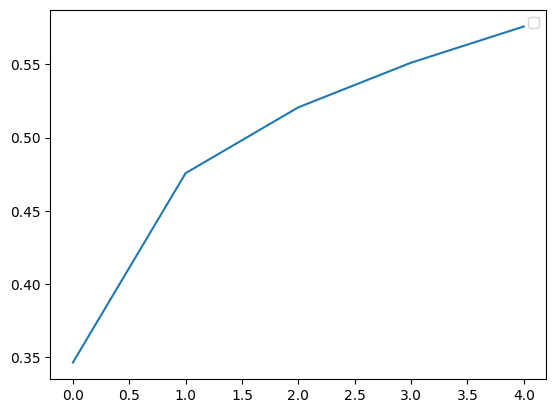

In [12]:

plt.plot(logs.history['accuracy'])
plt.legend()
plt.show()